30 March 2021 GC, R code to plot beeswarm

In [1]:
library("readxl")
library('data.table')
library("beeswarm")

In [2]:
read_CVC <- function(path_in) {
  dt <- read_excel(path_in)
  dt <- dt[ -c(1, 7)]
  bh5 <- subset(dt, Device=='BAHA5P')
  bh5 <- bh5[ -c(2)]
  bh5 <- bh5[, c(1, 4, 3, 2)]
  return(bh5)
}

In [3]:
path1 <- '/media/guido/LACIE/Cingle_Guido/Master/Headband/CVC_Sfront65_Nfront.xlsx'

In [4]:
bh5 <- read_CVC(path1)
bh5

New names:
* `` -> ...1



Study_ID,AC&BC_path,BC_path,AC_path
<dbl>,<dbl>,<dbl>,<dbl>
21,0.86,0.80,0.86
48,0.86,0.78,0.86
52,0.86,0.78,0.86
54,0.86,0.78,0.85
55,0.86,0.78,0.86
56,0.86,0.78,0.85
57,0.86,0.75,0.86
58,0.86,0.80,0.86
59,0.86,0.79,0.86


In [5]:
bh5_long <- melt(setDT(bh5), id.vars = c('Study_ID'), 
                 value.name = 'CVC_score', variable.name = 'Sound_path')
bh5_long

Study_ID,Sound_path,CVC_score
<dbl>,<fct>,<dbl>
21,AC&BC_path,0.86
48,AC&BC_path,0.86
52,AC&BC_path,0.86
54,AC&BC_path,0.86
55,AC&BC_path,0.86
56,AC&BC_path,0.86
57,AC&BC_path,0.86
58,AC&BC_path,0.86
59,AC&BC_path,0.86


In [6]:
clm = colnames(bh5)
sp = clm[-1]

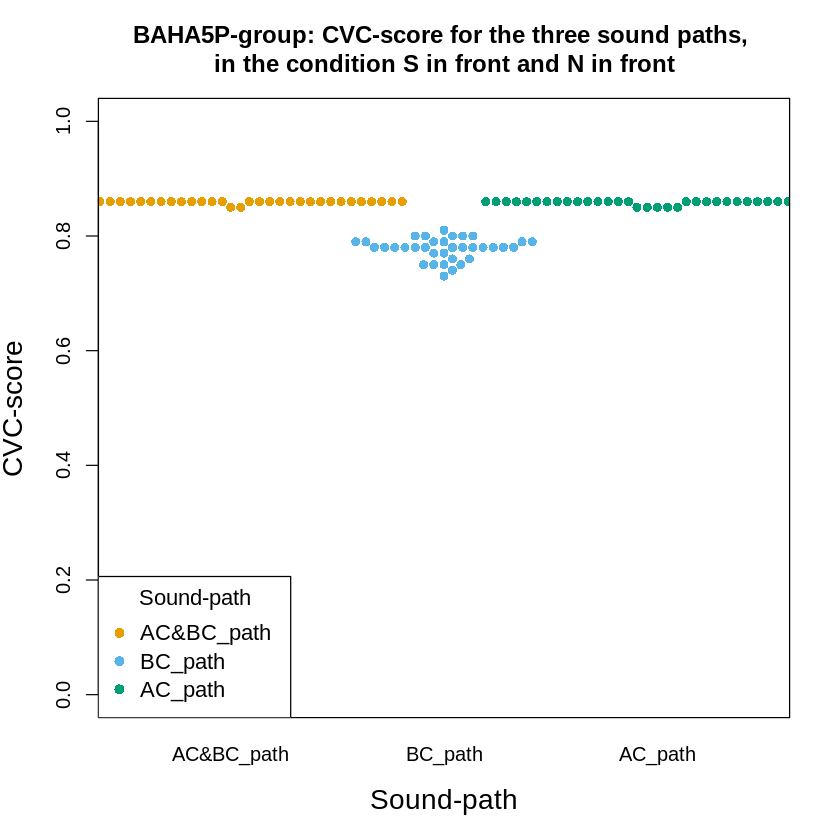

In [7]:
ttl = "BAHA5P-group: CVC-score for the three sound paths, 
in the condition S in front and N in front"
ColorBlind3  <- c("#E69F00", "#56B4E9", "#009E73")

beeswarm(CVC_score ~ Sound_path, data = bh5_long, pch = 16, col = ColorBlind3, 
         ylab = "CVC-score", xlab = "Sound-path", cex.lab=1.4, main = ttl, ylim=c(0, 1))
ylabel = seq(0.6, 1, by = 0.05)
#axis(2, at = ylabel, las = 2)
legend("bottomleft", legend = sp, title = "Sound-path", cex=1.1, pch = 16, col = ColorBlind3)

In [8]:
tiff("/home/guido/R/cingle/figures/CVC_Sf_Nf.tiff", units="in", width=7, height=7, res=300)
beeswarm(CVC_score ~ Sound_path, data = bh5_long, pch = 16, col = ColorBlind3, 
         ylab = "CVC-score", xlab = "Sound-path", cex.lab=1.4, ylim=c(0, 1))
legend("bottomleft", legend = sp, title = "Sound-path", pch = 16, col = ColorBlind3, cex = 1.1)
dev.off()

png 
  2